<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%ED%95%B4%EC%84%A4/ch03_06_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EB%B6%84%ED%8F%AC%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.06. 기초통계 - 분포통계량
---
* 날짜:
* 이름:

## 학습내용
    - 백분위수, 사분위수
    - 왜도
    - 첨도

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  분포 통계
---

* 분포통계는 데이터의 위치나 모양을 확인

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```

* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [ ]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.normal(loc=0, scale=1, size=1000)

* `a` 분포 그리기

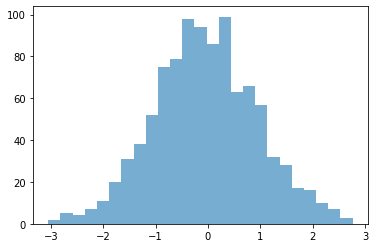

In [ ]:
plt.hist(a, alpha=.6, bins=25)
plt.show()

### **| 백분위수와 사분위수**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-03.png?raw=true width=800>
</p>

```
np.percentile(x,  percent)
np.quantile(x, percent_ratio)
```

* 하위 10% 에 위치한 값 확인

In [ ]:
# percentile 사용
print(np.percentile(a, 10))
# quantile 사용
print(np.quantile(a, 0.1)) # 사실상 같음

-1.2991423253580128
-1.2991423253580128


* 하위 80% 에 위치한 값 확인

In [ ]:
# percentile 사용
print(np.percentile(a, 80))
# quantile 사용
print(np.quantile(a, 0.8))

0.7883967913601156
0.7883967913601156


### **| 왜도 (skew)**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-01.png?raw=true width=800>
</p>



\begin{align}
\text{skew} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^3}{ \sqrt{\tfrac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}^{\,3}}
\end{align}

```
from scipy.stats import skew
skew(a)
```

* `a`의 왜도 구하기

In [ ]:
from scipy.stats import skew
skew(a)

0.03385895323565712

* 세개의 데이터의 분포를 그리고 각각의 왜도도 구해봅니다.

```
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]
```

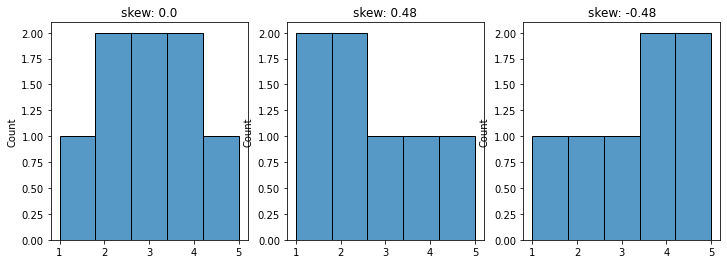

In [ ]:
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]

plt.figure(figsize=(12,4))
for i,x  in enumerate([x1,x2,x3]):
  plt.subplot(1,3,i+1)
  sns.histplot(x,bins=5)
  plt.title(f'skew: {np.round(skew(x),2)}')
plt.show()

### **| 첨도(kurtosis)**


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-02.png?raw=true width=300>
</p>


\begin{align}
\text{kurtosis} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^4}{\left(\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2\right)^2} - 3
\end{align}

```
from scipy.stats import kurtosis
kurtosis(a)
```

In [ ]:
from scipy.stats import kurtosis
kurtosis(a)

-0.0467663244783294

* 세개의 데이터의 분포를 그리고 각각의 첨도도 구해봅니다.

```
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]
```

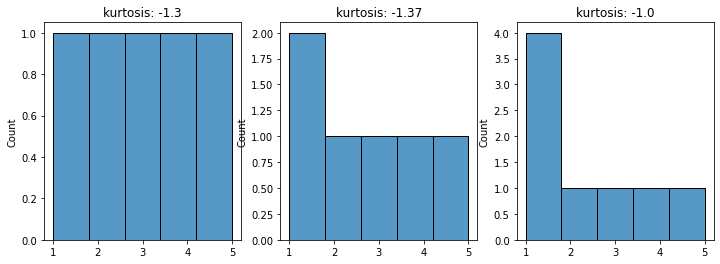

In [ ]:
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]

plt.figure(figsize=(12,4))
for i,x  in enumerate([x1,x2,x3]):
  plt.subplot(1,3,i+1)
  sns.histplot(x,bins=5)
  plt.title(f'kurtosis: {np.round(kurtosis(x),2)}')
plt.show()

## 예제
---

#### **예제 01**

1. 지난 시간에 배운 scipy 라이브러리의 gamma 함수를 사용합니다. 

2. a값이 4인 감마함수로 부터 표본을 1000개 추출하고 `x3`로 바인딩합니다.

4. a값이 12인 감마함수로 부터 표본을 1000개 추출하고 `x4`로 바인딩합니다.

6. `x3`의 모든 요소에 -1을 곱한 후 `x2`로 바인딩합니다.

6. `x4`의 모든 요소에 -1을 곱한 후 `x1`로 바인딩합니다.

7. `x1, x2, x3, x4`의 분포를 각각 그립니다.

7. `x1, x2, x3, x4`의 왜도를 각각 구합니다.

7. `x1, x2, x3, x4`의 첨도를 각각 구합니다.


In [ ]:
from scipy.stats import gamma

def get_x(a, n=1000):
  g = gamma(a=a)
  x = g.rvs(n)
  return x

x3 = get_x(4)
x4 = get_x(12)
x2 = -x3
x1 = -x4

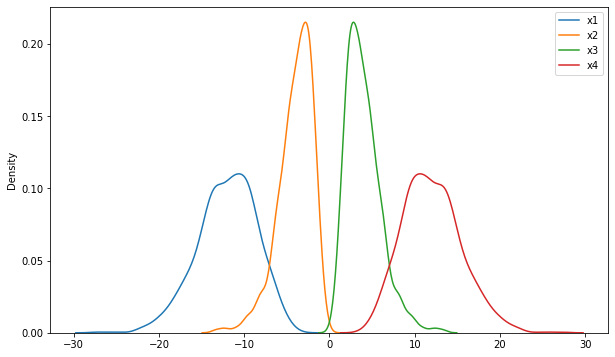

In [ ]:
fig = plt.figure(figsize=(10,6))
xs = ['x1','x2','x3','x4']
for x in xs:
  sns.kdeplot(x=eval(x))
plt.legend(xs)
plt.show()

In [ ]:
for x in xs:
  print(f'* {x}  skew : {np.round(skew(eval(x)),2)}, kutosis: {np.round(kurtosis(eval(x)),2)}')

* x1  skew : -0.44, kutosis: 0.24
* x2  skew : -1.11, kutosis: 1.83
* x3  skew : 1.11, kutosis: 1.83
* x4  skew : 0.44, kutosis: 0.24


#### **예제 02**

타이타닉 데이터셋을 가져오고, 수치자료형 변수들의 **산포통계**와 **분포통계**를 정리하세요.